In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
def load_data(directory, file_name, names=None, header=None, skiprows=0):
    return pd.read_excel(os.path.join(directory, file_name), names=names, header=header, skiprows=skiprows, skipinitialspace=True)

In [3]:
def load_csv_data(directory, file_name, names=None, header=None, skiprows=0, skipinitialspace=True):
    return pd.read_csv(os.path.join(directory, file_name), names=names, header=header, skiprows=skiprows, skipinitialspace=skipinitialspace)

In [4]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [5]:
def scoring_using_cross_validation(m, x, y, s='accuracy'):
    print("************* Start of Cross Validation {} {} *************".format(s, m))
    scores_ = cross_val_score(m, x, y, scoring="accuracy", cv=10)
    rmse_scores_ = np.sqrt(scores_)
    display_scores(rmse_scores_)
    print("************* End of Cross Validation {} {}*************".format(s, m))


def print_scores(m, Y_test, Y_predictions):
    print("************* {} *************".format(m))
    mse_ = mean_squared_error(Y_test, Y_predictions)
    print("mse ", mse_)
    acc_ = accuracy_score(Y_test, Y_predictions)
    print("acc ", acc_)
    print("****************************************")


In [6]:
base_directory = '~/workspace/personal/datasets/DryBeanDataset'

columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 
           'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
           'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [7]:
dry_bean_df = pd.read_excel(os.path.join(base_directory, 'Dry_Bean_Dataset.xlsx'))
print(list(dry_bean_df))

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


In [8]:
split = ShuffleSplit(test_size=0.20, random_state=1)
train_index, test_index = list(split.split(dry_bean_df[columns]))[0]

In [9]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

ct = ColumnTransformer([
        ("norm2", num_pipeline, columns)
], remainder='passthrough')

lb = LabelEncoder()

X_train_set = dry_bean_df.loc[train_index].drop(['Class'], axis=1)
X_test_set = dry_bean_df.loc[test_index].drop(['Class'], axis=1)

Y_train_set = dry_bean_df['Class'].copy().loc[train_index]
Y_test_set = dry_bean_df['Class'].copy().loc[test_index]

In [10]:
X_train = ct.fit_transform(X_train_set)
Y_train = lb.fit_transform(Y_train_set)

X_test = ct.transform(X_train_set)
Y_test = lb.transform(Y_train_set)

In [11]:
def evaluate_model(model):
    Y_predictions = model.predict(X_test)
    precision_ = precision_score(Y_test, Y_predictions, average='weighted')
    print("precision_ ", precision_)
    recall_ = recall_score(Y_test, Y_predictions, average='weighted')
    print("recall_ ", recall_)
    f1_score_ = f1_score(Y_test, Y_predictions, average='weighted')
    print("f1_score_ ", f1_score_)
    if hasattr(model, 'decision_function'):
        scores_ = model.decision_function(X_test[:5, :])
        print("Decision Function Results {}".format(scores_))
        print(lb.inverse_transform(Y_test[:5]))
    return Y_predictions


In [12]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, Y_train)
Y_predictions = evaluate_model(sgd_clf)

precision_  0.9177138955383257
recall_  0.9168809698750918
f1_score_  0.9170035465379269
Decision Function Results [[   3.45907469 -115.92511136   -5.21566056  -15.47407751   -2.97047927
    -6.55434262   -5.17651643]
 [  -5.68815358 -174.2136629    -8.03771542    0.45840623   -7.00562391
    -3.65578351   -0.47254339]
 [  -7.30795696 -179.32381461  -10.47930844    0.95271579   -9.52274048
    -3.80118078   -2.35564641]
 [   3.64560046  -53.67396456   -4.29178736  -23.61265358  -13.9598705
    -9.68891206  -16.59601367]
 [  -2.61011405 -115.89189173    0.58489063  -13.54242175   -2.78312171
   -10.86760874   -2.83125769]]
['BARBUNYA' 'SIRA' 'SIRA' 'BARBUNYA' 'CALI']


### Cross Validate with decision function

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
[0 1 2 3 4 5 6]
[[ 967    0   42    0    4    7   32]
 [   1  418    0    0    0    0    0]
 [  56    0 1170    0   32    2   37]
 [   1    0    0 2669    3   34  134]
 [   8    0   10   18 1454    0   52]
 [  17    0    0   39    0 1510   56]
 [   9    0    1  263   30   17 1795]]


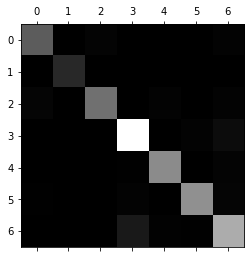

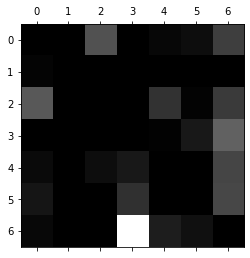

In [13]:
from sklearn.metrics import confusion_matrix

y_scores_ = cross_val_predict(sgd_clf, X_train, Y_train, cv=3, method="decision_function")
conf_mx = confusion_matrix(Y_train, Y_predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(lb.classes_)
print(lb.transform(lb.classes_))
print(conf_mx)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [14]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
Y_predictions = evaluate_model(dt_clf)

precision_  1.0
recall_  1.0
f1_score_  1.0


In [15]:
X_test = ct.fit_transform(test_data_set.drop(["Class"], axis=1))
Y_test = lb.transform(test_data_set["Class"].copy())

NameError: name 'test_data_set' is not defined

In [ ]:
Y_predictions = dt_clf.predict(X_test)
evaluate_model(dt_clf)
conf_mx = confusion_matrix(Y_test, Y_predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(lb.classes_)
print(lb.transform(lb.classes_))
print(conf_mx)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
Y_predictions = evaluate_model(rf_clf)

Y_predictions = dt_clf.predict(X_test)
evaluate_model(dt_clf)
conf_mx = confusion_matrix(Y_test, Y_predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
print(lb.classes_)
print(lb.transform(lb.classes_))
print(conf_mx)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)